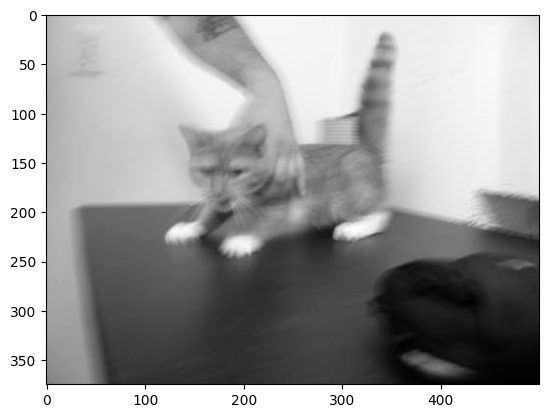

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


DATADIR = "D:/Datasets"

CATEGORIES = ["Cat", "Dog"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [2]:
print(img_array)

[[167 167 168 ... 204 203 202]
 [167 167 168 ... 204 203 203]
 [167 167 168 ... 205 204 203]
 ...
 [124 124 124 ...   2   2   2]
 [123 123 123 ...   1   1   1]
 [122 122 123 ...   1   1   1]]


<function matplotlib.pyplot.show(close=None, block=None)>

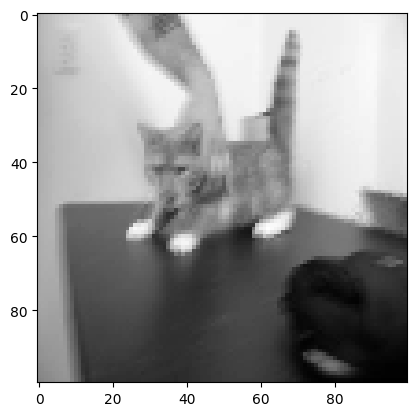

In [3]:
IMG_SIZE = 100
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show

In [4]:
training_data = []
def create_training_data():
    for category in CATEGORIES:

        path =os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()
print(len(training_data))
        

100%|██████████| 201/201 [00:05<00:00, 34.12it/s]

401


In [5]:
import random
random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
1
0
1
1
0


In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE,IMG_SIZE,1))
X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE,1)

[[[[127]
   [102]
   [130]
   ...
   [172]
   [171]
   [183]]

  [[117]
   [123]
   [160]
   ...
   [155]
   [166]
   [167]]

  [[106]
   [132]
   [151]
   ...
   [117]
   [118]
   [139]]

  ...

  [[166]
   [ 88]
   [150]
   ...
   [115]
   [107]
   [117]]

  [[111]
   [175]
   [145]
   ...
   [103]
   [105]
   [ 98]]

  [[173]
   [134]
   [156]
   ...
   [141]
   [111]
   [ 93]]]]


In [8]:
import pickle 
pickle_out = open("Cat","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Dog","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [9]:
pickle_in = open("Cat","rb")
X = pickle.load(pickle_in)

pickle_in = open("Dog","rb")
y = pickle.load(pickle_in)



In [10]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [11]:


import pickle

In [12]:
pickle_in = open("Cat","rb")
X = pickle.load(pickle_in)

pickle_in = open("Dog","rb")
y = pickle.load(pickle_in)

X = X/200.0

In [1]:
import tensorflow as tf
import pickle
import numpy as np

In [14]:
pickle_in = open("Cat","rb")
X_train = pickle.load(pickle_in)
pickle_in =open("Dog","rb")
y_train = pickle.load(pickle_in)
input_tensor = tf.convert_to_tensor

In [15]:
X_train = X_train/255.0

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),
input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


In [17]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))

In [18]:
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [20]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [21]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
13/13 [==============================] - 22s 964ms/step - loss: 0.7273 - accuracy: 0.5237
Epoch 2/10
13/13 [==============================] - 12s 886ms/step - loss: 0.6897 - accuracy: 0.5162
Epoch 3/10
13/13 [==============================] - 12s 946ms/step - loss: 0.6657 - accuracy: 0.6534
Epoch 4/10
13/13 [==============================] - 12s 936ms/step - loss: 0.7093 - accuracy: 0.5287
Epoch 5/10
13/13 [==============================] - 13s 1s/step - loss: 0.6568 - accuracy: 0.6185
Epoch 6/10
13/13 [==============================] - 11s 851ms/step - loss: 0.6043 - accuracy: 0.7182
Epoch 7/10
13/13 [==============================] - 11s 852ms/step - loss: 0.5550 - accuracy: 0.7406
Epoch 8/10
13/13 [==============================] - 12s 897ms/step - loss: 0.4880 - accuracy: 0.7830
Epoch 9/10
13/13 [==============================] - 11s 857ms/step - loss: 0.4087 - accuracy: 0.8504
Epoch 10/10
13/13 [==============================] - 11s 849ms/step - loss: 0.3108 - accuracy:

In [22]:
import tensorflow as tf
logdir = "logs/Cats-vs-dogs-CNN"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

In [23]:
model.fit(X_train,y_train,epochs=10,batch_size=32,callbacks=[tensorboard_callback])

Epoch 1/10
13/13 [==============================] - 18s 1s/step - loss: 0.2230 - accuracy: 0.9352
Epoch 2/10
13/13 [==============================] - 14s 1s/step - loss: 0.1829 - accuracy: 0.9526
Epoch 3/10
13/13 [==============================] - 13s 971ms/step - loss: 0.1165 - accuracy: 0.9950
Epoch 4/10
13/13 [==============================] - 13s 995ms/step - loss: 0.0819 - accuracy: 0.9875
Epoch 5/10
13/13 [==============================] - 14s 1s/step - loss: 0.0558 - accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 14s 1s/step - loss: 0.0342 - accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 14s 1s/step - loss: 0.0279 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 18s 1s/step - loss: 0.0239 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 21s 2s/step - loss: 0.0129 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 15s 1s/step - loss: 0.0098 - accuracy: 1.0000


In [1]:
import tensorflow as tf 
import numpy as np
import pickle
import time
from tensorflow.keras.callbacks import TensorBoard

In [2]:
logdir = "Cat-vs-dogs-CNN"

In [3]:
pickle_in = open("Cat","rb")
X_train = pickle.load(pickle_in)
pickle_in = open("Dog","rb")
y_train = pickle.load(pickle_in)

X_train = X_train/255.0

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(256,(3,3),
input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [5]:
model.add(tf.keras.layers.Conv2D(256,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [6]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))

In [7]:
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

In [8]:
tensorboard = TensorBoard(log_dir="logs/{},".format(logdir))

In [9]:
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [10]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [11]:
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.3,callbacks=[tensorboard])

Epoch 1/10
9/9 [==============================] - 612s 68s/step - loss: 1.4376 - accuracy: 0.5393 - val_loss: 0.6871 - val_accuracy: 0.5702
Epoch 2/10
9/9 [==============================] - 450s 51s/step - loss: 0.6974 - accuracy: 0.4929 - val_loss: 0.6928 - val_accuracy: 0.5041
Epoch 3/10
9/9 [==============================] - 367s 41s/step - loss: 0.6879 - accuracy: 0.5964 - val_loss: 0.6931 - val_accuracy: 0.5041
Epoch 4/10
9/9 [==============================] - 386s 44s/step - loss: 0.6689 - accuracy: 0.6286 - val_loss: 0.6857 - val_accuracy: 0.5455
Epoch 5/10
9/9 [==============================] - 447s 51s/step - loss: 0.6393 - accuracy: 0.6464 - val_loss: 0.6919 - val_accuracy: 0.5289
Epoch 6/10
9/9 [==============================] - 426s 47s/step - loss: 0.5580 - accuracy: 0.7464 - val_loss: 0.7296 - val_accuracy: 0.5207
Epoch 7/10
9/9 [==============================] - 513s 59s/step - loss: 0.4587 - accuracy: 0.8071 - val_loss: 0.7761 - val_accuracy: 0.5289
Epoch 8/10
9/9 [====

In [2]:
import tensorflow as tf
import numpy as np
import pickle 
import time
from tensorflow.keras.callbacks import TensorBoard

In [3]:
pickle_in = open("Cat","rb")
X_train = pickle.load(pickle_in)
pickle_in = open("Dog","rb")
y_train = pickle.load(pickle_in)
X_train =X_train/255.0
input_tensor = tf.convert_to_tensor

In [18]:
def CNN_model():
    dense_layers = [0,1,2]
    layer_sizes = [32,64,128]
    conv_layers = [1,2,3]
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:
                NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layers,int(time.time()))
                print(NAME)

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(layer_size,(3,3),
input_shape=X_train[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

TypeError: '<=' not supported between instances of 'list' and 'int'

In [12]:
dense_layers = [0 ,1 ,2]
layers_size = [32,64,128]
conv_layers = [1,2,3]
for dense_layers in [dense_layers]:
    for layers_size in [layers_size]:
        for conv_layers in [conv_layers]:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layers,layers_size,dense_layers,int(time.time()))
            print(NAME)
            model = tf.keras.Sequential()
            model.add(tf.keras.layers.Conv2D(layers_size,(3,3),
            input_shape=tuple(X_train.shape[1:])))
            model.add(tf.keras.layers.Activation('relu'))
            model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
        for l in range(conv_layers - 1):
            model.add(tf.keras.layers.Conv2D(layers_size,(3,3)))
            model.add(tf.keras.layers.Activation('relu'))
            model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

            model.add(tf.keras.layers.Flatten())

        for _ in range(dense_layers):
            model.add(tf.keras.layers.Dense(layers_size)) 
            model.add(tf.keras.layers.Activation('relu'))

            model.add(tf.keras.layers.Dense(1))
            model.add(tf.keras.layers.Activation('sigmoid'))

            X_train = np.asarray(X_train)
            y_train = np.asarray(y_train)
            

[1, 2, 3]-conv-[32, 64, 128]-nodes-[0, 1, 2]-dense-1672975975


TypeError: '<=' not supported between instances of 'list' and 'int'

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

In [20]:
dense_layers = [0 ,1 ,2]
layers_size = [32,64,128]
conv_layers = [1,2,3]
for dense_layers in dense_layers:
    for layers_size in layers_size:
        for conv_layers in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layers,layers_size,dense_layers,int(time.time()))
            print(NAME)

            model = tf.keras.Sequential()
            model.add(tf.reshape(100,100,10),input_shape=X_train.shape[1:])
            model.add(tf.keras.layers.Conv2D(layers_size,(3,3)))
            model.add(tf.keras.layers.Activation('relu'))
            model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
        for l in range(conv_layers - 1):
            model.add(tf.keras.layers.Conv2D(layers_size,(3,3)))
            model.add(tf.keras.layers.Activation('relu'))
            model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

            model.add(tf.keras.layers.Flatten())

        for _ in range(dense_layers):
            model.add(tf.keras.layers.Dense(layers_size)) 
            model.add(tf.keras.layers.Activation('relu'))

            model.add(tf.keras.layers.Dense(1))
            model.add(tf.keras.layers.Activation('sigmoid'))

            tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(NAME))
            model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
            X_train = np.asarray(X_train)
            y_train = np.asarray(y_train)
            model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.3,callbacks=[tensorboard])

1-conv-32-nodes-0-dense-1672977669


TypeError: can only concatenate str (not "int") to str

In [10]:
dense_layers = [0 ,1 ,2]
layers_size = [32,64,128]
conv_layers = [1,2,3]
for dense_layers in dense_layers:
    for layers_size in layers_size:
        for conv_layers in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layers,layers_size,dense_layers,time.time())
            print(NAME)

            model = tf.keras.Sequential()

            model.add(tf.keras.layers.Conv2D(layers_size,(3,3),input_shape=X.shape[1:]),
            model.add(tf.keras.layers.Activation('relu')),
            model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))),

            for l in range(conv_layers-1):
                 model.add(tf.keras.layers.Conv2D(layers_size,(3,3)
                model.add(tf.keras.layers.Activation('relu'))
                model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

        

SyntaxError: invalid syntax (4020393149.py, line 16)

In [20]:
import time
import pickle

pickle_in = open("Cat","rb")
X_train = pickle.load(pickle_in)
pickle_in = open("Dog","rb")
y_train = pickle.load(pickle_in)

X_train = X_train/255.0
dense_layers = [0 ,1 ,2]
layers_size = [32,64,128]
conv_layers = [1,2,3]
for dense_layers in dense_layers:
    for layers_size in layers_size:
        for conv_layers in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layers,layers_size,dense_layers,time.time())
            print(NAME)

            model = tf.keras.Sequential()

            model.add(tf.keras.layers.Conv2D(layers_size,(3,3),input_shape=X.shape[1:])
            model.add(tf.keras.layers.Activation('relu'))
            model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

            for l in range(conv_layers-1):
                model.add(tf.keras.layers.Conv2D(layers_size,(3,3)
                model.add(tf.keras.layers.Activation('relu'))
                model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

            model.add(tf.keras.layers.Flatten())
            for _ in range(dense_layers):
                model.add(tf.keras.layers.Dense(layers_size))
                model.add(tf.keras.layers.Activation('relu'))

            model.add(tf.keras.layers.Dense(1))
            model.add(tf.keras.layers.Activation('sigmoid'))

SyntaxError: invalid syntax (1797644044.py, line 17)

In [43]:
NAME = "Cats-vs-dogs-CNN"
tensorboard = TensorBoard(log_dir="logs{}".format(NAME))

NameError: name 'TensorBoard' is not defined

In [12]:
import pickle
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()
path = "D:/PetImages/Dog/"

with strategy.scope():
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(1,input_shape=(1,))])
    model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.metrics.mse)
    model.fit(np.array([[1]]),np.array([[1]]))
    tf.keras.models.save_model(model,pickle_in)
    tf.keras.models.load_model(pickle_in)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
1/1 [==============================] - 6s 6s/step - loss: 6.2007


AttributeError: '_io.BufferedReader' object has no attribute 'endswith'

In [17]:
model.add(layers.Conv2D(32,(3,3), activation='relu'),input_shape=(32,32,3))

TypeError: Sequential.add() got an unexpected keyword argument 'input_shape'

In [9]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

ValueError: Input 0 of layer "max_pooling2d" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 1352)

In [40]:
model.add(tf.keras.layers.Flatten())

In [41]:
model.add(tf.keras.layers.Dense(units=64,activation=tf.nn.relu))

In [46]:
model.add(tf.keras.layers.Dropout(rate=0.2)),
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)),
model.compile(optimizer='adam',loss='sparsecategorical_crosentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                346176    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [1]:
model.fit(epochs=3)

NameError: name 'model' is not defined

In [14]:
import numpy as np
import tensorflow as tf


In [17]:
datasets = tf.data.Dataset.list_files("D:/PetImages/Cat")

def load_and_preprocesing_image(filepath):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_png(image)
    image = tf.image.resize(image,(256,256))
    image = tf.random_flip_left_right(image)
    image = tf.image.random_brightness(image,max_delta=0.5)
    return image

    datasets = datasets.map(load_and_preprocesing_image)

    datasets = datasets.batch(32)

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense)
model.add(tf.keras.layers.MaxPooling2D)

model.compile(optimizer=tf.keras.optimizers.Adam(),
loos=tf.keras.losses.SparseCategoricalCrossentropy())

model.fit(datasets,epochs=10)

model.evaluate(datasets)

TypeError: The added layer must be an instance of class Layer. Received: layer=<class 'keras.layers.core.dense.Dense'> of type <class 'type'>.

In [13]:
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()
path = "D:/PetImages/Dog/"

with strategy.scope():
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(1,input_shape=(1,))])
    model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.metrics.mse)
    model.fit(np.array([[1]]),np.array([[1]]))
    tf.keras.models.save_model(model,path)
    tf.keras.models.load_model(path)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
1/1 [==============================] - 11s 11s/step - loss: 0.4415


INFO:tensorflow:Assets written to: D:/PetImages/Dog/assets


INFO:tensorflow:Assets written to: D:/PetImages/Dog/assets


In [ ]:
()